In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

170500096/170498071 [==============================] - 495s 3us/step


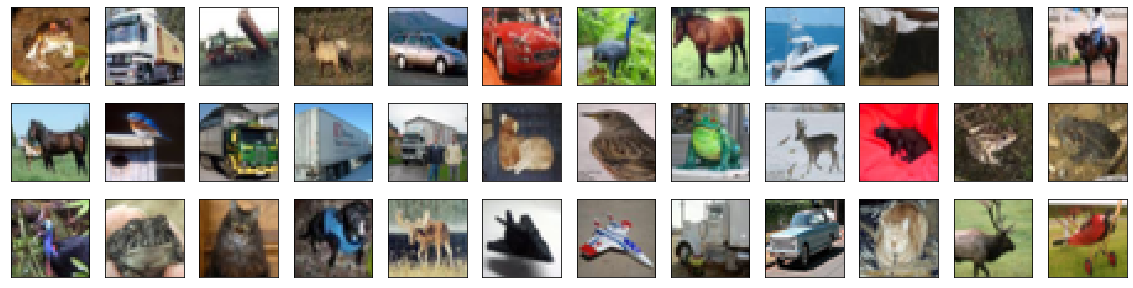

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
________________________________________________

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [7]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 24s - loss: 1.5724 - accuracy: 0.4314 - val_loss: 1.3619 - val_accuracy: 0.5084

Epoch 00001: val_loss improved from inf to 1.36190, saving model to model.weights.best.hdf5
Epoch 2/100
 - 23s - loss: 1.2725 - accuracy: 0.5468 - val_loss: 1.1872 - val_accuracy: 0.5800

Epoch 00002: val_loss improved from 1.36190 to 1.18719, saving model to model.weights.best.hdf5
Epoch 3/100
 - 23s - loss: 1.1498 - accuracy: 0.5960 - val_loss: 1.1450 - val_accuracy: 0.5888

Epoch 00003: val_loss improved from 1.18719 to 1.14502, saving model to model.weights.best.hdf5
Epoch 4/100
 - 23s - loss: 1.0837 - accuracy: 0.6188 - val_loss: 1.0268 - val_accuracy: 0.6500

Epoch 00004: val_loss improved from 1.14502 to 1.02675, saving model to model.weights.best.hdf5
Epoch 5/100
 - 23s - loss: 1.0417 - accuracy: 0.6376 - val_loss: 1.2022 - val_accuracy: 0.5866

Epoch 00005: val_loss did not improve from 


Epoch 00051: val_loss did not improve from 0.90786
Epoch 52/100
 - 24s - loss: 1.6098 - accuracy: 0.4528 - val_loss: 1.4501 - val_accuracy: 0.4956

Epoch 00052: val_loss did not improve from 0.90786
Epoch 53/100
 - 25s - loss: 1.6378 - accuracy: 0.4438 - val_loss: 1.8322 - val_accuracy: 0.4522

Epoch 00053: val_loss did not improve from 0.90786
Epoch 54/100
 - 23s - loss: 1.6536 - accuracy: 0.4400 - val_loss: 1.5883 - val_accuracy: 0.4334

Epoch 00054: val_loss did not improve from 0.90786
Epoch 55/100
 - 24s - loss: 1.6648 - accuracy: 0.4394 - val_loss: 2.7345 - val_accuracy: 0.4720

Epoch 00055: val_loss did not improve from 0.90786
Epoch 56/100
 - 23s - loss: 1.6778 - accuracy: 0.4241 - val_loss: 1.5425 - val_accuracy: 0.4606

Epoch 00056: val_loss did not improve from 0.90786
Epoch 57/100
 - 27s - loss: 1.6839 - accuracy: 0.4250 - val_loss: 1.4779 - val_accuracy: 0.4800

Epoch 00057: val_loss did not improve from 0.90786
Epoch 58/100
 - 26s - loss: 1.6975 - accuracy: 0.4195 - val_

In [13]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [14]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6761999726295471


In [15]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

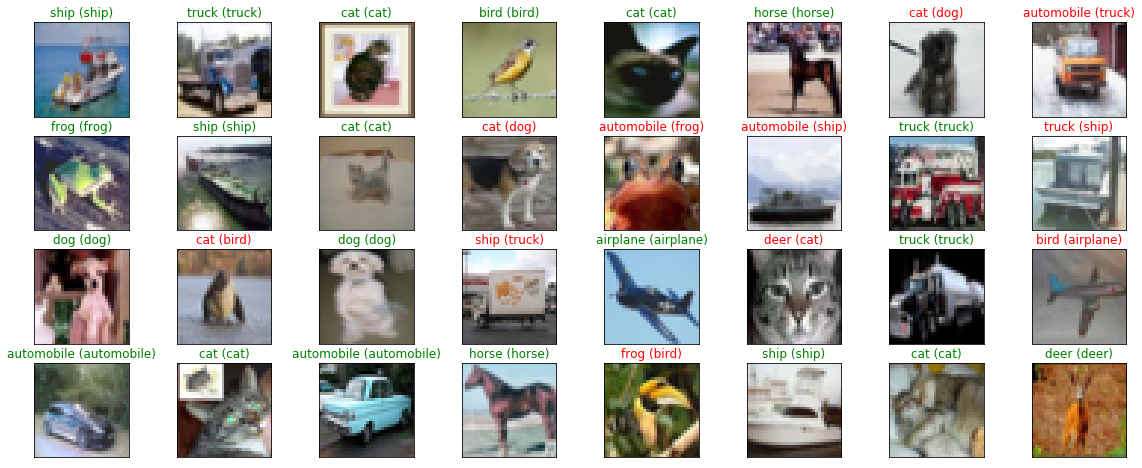

In [16]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))